<a href="https://colab.research.google.com/github/tobonjose9/Tarea-1/blob/Tarea4/Tarea4/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea #: 4  
##Tema:  Clasificación de datos utilizando texto  
##Fecha entrega: 11:59 pm  Junio 06 de 2025
##Objetivo: Utilizar modelos de regresión logística y lstm  para crear un modelo de clasificación utilizando datos reales .
##Entrega: Crear una rama utilizando el mismo repositorio de la tarea 1, 2 y 3, crear otra carpeta  llamada tarea 4, solucionar el problema y crear un pull request sobre la master donde me debe  poner como reviewer (entregas diferentes  tienen una reducción de 0.5 puntos).

#Parte1


In [1]:
!pip install opendatasets
import opendatasets as od

In [9]:
dataset_url = 'https://www.kaggle.com/competitions/descubrir-senal-sonido-2025/overview'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: josetobon
Your Kaggle Key: ··········


100%|██████████| 399k/399k [00:00<00:00, 261MB/s]


Extracting archive ./descubrir-senal-sonido-2025/descubrir-senal-sonido-2025.zip to ./descubrir-senal-sonido-2025


In [10]:
import os
os.chdir('/content/descubrir-senal-sonido-2025')
os.listdir()

['train.csv', 'test.csv']

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import numpy as np
import unicodedata
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [ ]:
!pip install sounddevice


In [12]:
!apt-get update
!apt-get install -y libportaudio2

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,759 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,246 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,984 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,017 kB]
Hit:13 https://ppa.launc

In [ ]:
import sounddevice as sd

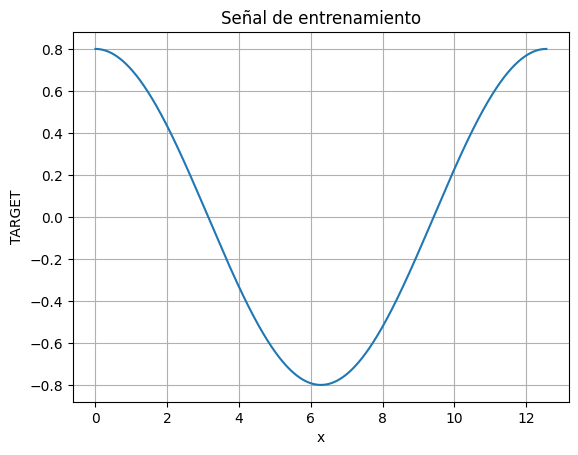

In [ ]:
# Cargar dataset de entrenamiento
df = pd.read_csv('train.csv')
x = df['x'].values.astype(np.float32)
y = df['TARGET'].values.astype(np.float32)

# Visualizar señal original
plt.plot(x, y)
plt.title("Señal de entrenamiento")
plt.xlabel("x")
plt.ylabel("TARGET")
plt.grid(True)
plt.show()

In [ ]:
# BLOQUE 2 – Definir función y_predict
def y_predict(a, b, c, d, x):
    return a * math.cos(b * x + c) + d

In [ ]:
# BLOQUE 3 – Gradiente descendente procedural como el documento

lr = 0.05
n = len(x)
batch = 100
epochs = 3000
rsl = []

# Inicialización de parámetros
a = random.random()
b = random.random()
c = random.random()
d = 0

for i in range(epochs):
    a_gradiente = 0
    b_gradiente = 0
    c_gradiente = 0
    d_gradiente = 0
    e = 0

    for m in range(batch):
        ix = int(random.uniform(0, n))
        y_hat = y_predict(a, b, c, d, x[ix])
        error = y[ix] - y_hat
        e += error * error

        a_gradiente += -2 * error * math.cos(b * x[ix] + c)
        b_gradiente += 2 * error * a * x[ix] * math.sin(b * x[ix] + c)
        c_gradiente += 2 * error * a * math.sin(b * x[ix] + c)

    # Actualización de parámetros
    a = a - lr * a_gradiente / batch
    b = b - lr * b_gradiente / batch
    c = c - lr * c_gradiente / batch

    e = e / batch
    rsl.append([a, b, c, d, e])

    if i in [9, 399, 999, 1999, 2999]:
        print(f"Epoch {i+1} - error: {e:.6f} | period: {b:.4f} | amplitude: {a:.4f} | phase: {c:.4f}")


Epoch 10 - error: 0.005238 | period: 0.4700 | amplitude: 0.8715 | phase: 0.1780
Epoch 400 - error: 0.000012 | period: 0.4982 | amplitude: 0.8016 | phase: 0.0132
Epoch 1000 - error: 0.000000 | period: 0.5000 | amplitude: 0.8000 | phase: 0.0003
Epoch 2000 - error: 0.000000 | period: 0.5000 | amplitude: 0.8000 | phase: 0.0000
Epoch 3000 - error: 0.000000 | period: 0.5000 | amplitude: 0.8000 | phase: 0.0000


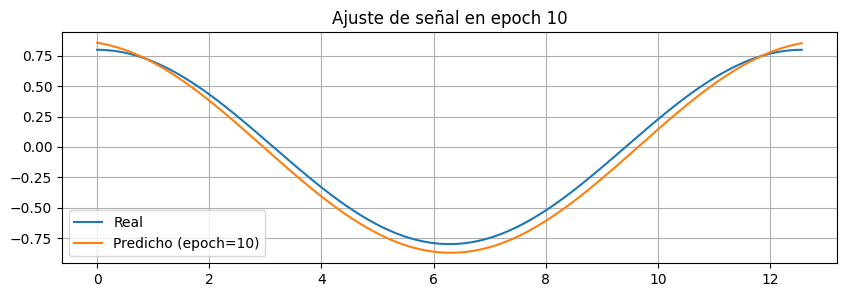

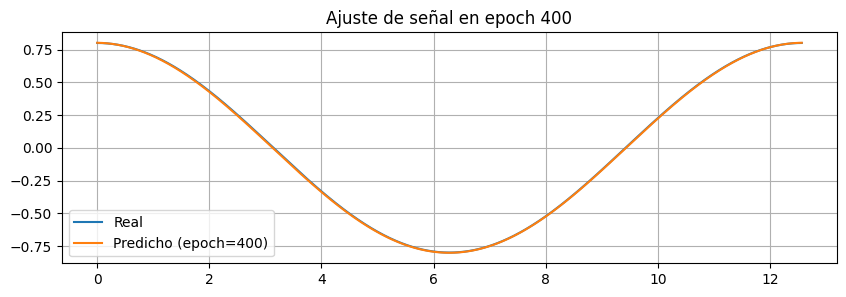

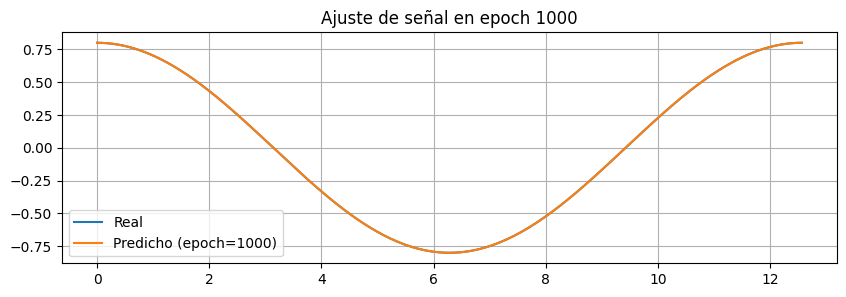

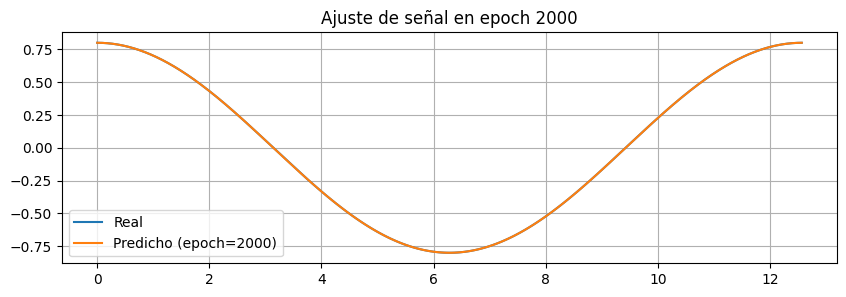

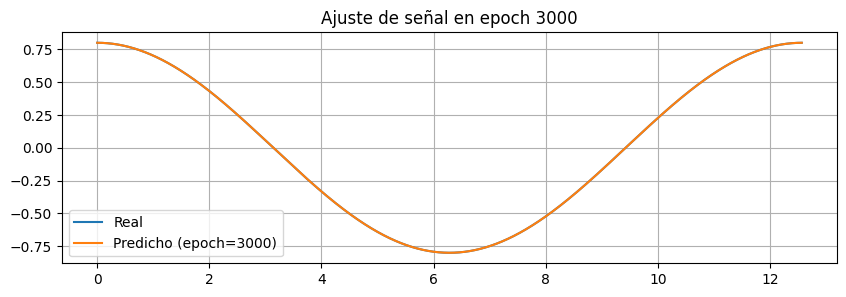

In [ ]:
# BLOQUE 4 – Visualizar señal aprendida en ciertos epochs
for epoch in [9, 399, 999, 1999, 2999]:
    a_, b_, c_, d_, _ = rsl[epoch]
    y_hat = [y_predict(a_, b_, c_, d_, xi) for xi in x]

    plt.figure(figsize=(10, 3))
    plt.plot(x, y, label='Real')
    plt.plot(x, y_hat, label=f'Predicho (epoch={epoch+1})')
    plt.legend()
    plt.title(f"Ajuste de señal en epoch {epoch+1}")
    plt.grid(True)
    plt.show()

In [ ]:
from google.colab import files
from scipy.io.wavfile import write

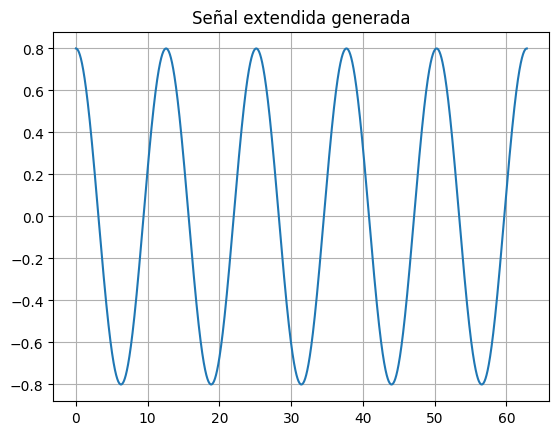

No se puede reproducir audio en este entorno: Error querying device -1
Audio guardado como 'output.wav'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# BLOQUE 5 – Crear señal extendida y reproducir (si es posible)

# Últimos parámetros aprendidos
a_final, b_final, c_final, d_final, _ = rsl[-1]

x_min = x.min()
x_long = np.arange(x_min, 20 * math.pi, 0.001).astype(np.float32)
long_s = [y_predict(a_final, b_final, c_final, d_final, xi) for xi in x_long]

plt.plot(x_long, long_s)
plt.title("Señal extendida generada")
plt.grid(True)
plt.show()

# Intentar reproducir (solo si el entorno lo permite)
try:
    sd.play(long_s, samplerate=44100)
    sd.wait()
except Exception as e:
    print("No se puede reproducir audio en este entorno:", e)

# Guardar como archivo WAV para entregar
write("output.wav", 44100, (np.array(long_s) * 32767).astype(np.int16))
print("Audio guardado como 'output.wav'")

files.download('output.wav')

In [ ]:
# BLOQUE 6 – Predecir archivo test.csv y generar archivo de envío

df_test = pd.read_csv('test.csv')
x_test = df_test['x'].values.astype(np.float32)
y_test_pred = [y_predict(a_final, b_final, c_final, d_final, xi) for xi in x_test]

submission = pd.DataFrame({
    'example_id': df_test['example_id'],
    'TARGET': y_test_pred
})
submission.to_csv('submission_tarea4_parte1.csv', index=False)
print("Archivo 'submission_tarea4_parte1.csv' generado para Kaggle.")


Archivo 'submission_tarea4_parte1.csv' generado para Kaggle.


In [ ]:
from google.colab import files
files.download('submission_tarea4_parte1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Parte 2

In [4]:
import pandas as pd
import numpy as np
import re
import unicodedata
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter


In [6]:
dataset_url = 'https://www.kaggle.com/competitions/clasificar-texto-lstm-2025/overview'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: josetobon
Your Kaggle Key: ··········


100%|██████████| 21.6k/21.6k [00:00<00:00, 34.4MB/s]


Extracting archive ./clasificar-texto-lstm-2025/clasificar-texto-lstm-2025.zip to ./clasificar-texto-lstm-2025


In [19]:
import os
os.chdir('/content/clasificar-texto-lstm-2025')
os.listdir()

['train.csv', 'test.csv']

In [14]:
# Cambiar al directorio con los datos descargados de Kaggle
os.chdir('/content/clasificar-texto-lstm-2025')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [34]:
import os
import pandas as pd
import numpy as np
import re
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from google.colab import files

In [36]:
# Cambiar al directorio con los datos descargados
os.chdir('/content/clasificar-texto-lstm-2025')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Función de limpieza
def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = unicodedata.normalize('NFD', texto).encode('ascii', 'ignore').decode('utf-8')
    texto = re.sub(r'[^a-z\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# Aplicar limpieza
train_df['titulo_limpio'] = train_df['titulo'].apply(limpiar_texto)
test_df['titulo_limpio'] = test_df['titulo'].apply(limpiar_texto)


In [37]:
# Verificación especial para "Gente y Blogs"
if 'Gente y Blogs' not in train_df['categoria'].unique():
    print("\n¡Advertencia: 'Gente y Blogs' no encontrada en las categorías!")
else:
    print("\n'Gente y Blogs' detectada correctamente en las categorías")

# Análisis completo de categorías
print("\nDistribución completa de categorías:")
categoria_counts = train_df['categoria'].value_counts()
print(categoria_counts)

# Lista completa
categorias_principales = sorted(train_df['categoria'].unique().tolist())
print(f"\nTotal de categorías únicas: {len(categorias_principales)}")
print("Lista completa de categorías:")
for i, cat in enumerate(categorias_principales):
    print(f"{i+1}. {cat}")

# Codificación de etiquetas
label_encoder = LabelEncoder()
train_df['categoria_encoded'] = label_encoder.fit_transform(train_df['categoria'])

if 'Gente y Blogs' in label_encoder.classes_:
    idx = list(label_encoder.classes_).index('Gente y Blogs')
    print(f"\n'Gente y Blogs' codificada como: {idx}")
    print(train_df[train_df['categoria'] == 'Gente y Blogs'][['titulo', 'categoria']].head())
else:
    print("\n¡Error: 'Gente y Blogs' no fue codificada!")

print("\nMapeo completo de categorías a códigos:")
for i, cat in enumerate(label_encoder.classes_):
    print(f"{cat}: {i}")



'Gente y Blogs' detectada correctamente en las categorías

Distribución completa de categorías:
categoria
Entretenimiento         223
Deportes                189
Película y Animación    173
Educación               113
Gente y Blogs            54
Otros                    48
Name: count, dtype: int64

Total de categorías únicas: 6
Lista completa de categorías:
1. Deportes
2. Educación
3. Entretenimiento
4. Gente y Blogs
5. Otros
6. Película y Animación

'Gente y Blogs' codificada como: 3
                                               titulo      categoria
25                       #VotoCriollo - El chontaduro  Gente y Blogs
26                 #VotoCriollo - Las sillas criollas  Gente y Blogs
27                   #VotoCriollo - Oficios de parque  Gente y Blogs
34  1° Conversatorio Todo lo que Somos - Rompiendo...  Gente y Blogs
55           Aislados - Canción 'La peroleta', Tumaco  Gente y Blogs

Mapeo completo de categorías a códigos:
Deportes: 0
Educación: 1
Entretenimiento: 2
Gente y B

In [38]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(train_df['titulo_limpio'])
y = train_df['categoria_encoded']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Regresión Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Regresión Logística:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))


Regresión Logística:
                      precision    recall  f1-score   support

            Deportes       0.67      0.89      0.76        38
           Educación       0.71      0.21      0.32        24
     Entretenimiento       0.64      0.77      0.70        48
       Gente y Blogs       1.00      0.12      0.22         8
               Otros       1.00      0.10      0.18        10
Película y Animación       0.45      0.59      0.51        32

            accuracy                           0.61       160
           macro avg       0.75      0.45      0.45       160
        weighted avg       0.66      0.61      0.56       160



In [39]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))



Random Forest:
                      precision    recall  f1-score   support

            Deportes       0.82      0.84      0.83        38
           Educación       0.50      0.38      0.43        24
     Entretenimiento       0.70      0.79      0.75        48
       Gente y Blogs       0.75      0.38      0.50         8
               Otros       0.78      0.70      0.74        10
Película y Animación       0.53      0.59      0.56        32

            accuracy                           0.68       160
           macro avg       0.68      0.61      0.63       160
        weighted avg       0.67      0.68      0.67       160



In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Tokenización
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['titulo_limpio'])
X_seq = tokenizer.texts_to_sequences(train_df['titulo_limpio'])
X_pad = pad_sequences(X_seq, maxlen=20)

# Codificación y división
y_enc = train_df['categoria_encoded'].values
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_enc, test_size=0.2, random_state=42)

# Modelo LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=20),
    LSTM(32, dropout=0.3, recurrent_dropout=0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    callbacks=[early_stop]
)

# Evaluar
y_pred_lstm = np.argmax(model.predict(X_test_lstm), axis=1)

print("\nLSTM:")
print(classification_report(y_test_lstm, y_pred_lstm, target_names=label_encoder.classes_))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.2545 - loss: 1.7745 - val_accuracy: 0.4125 - val_loss: 1.6889
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3456 - loss: 1.6687 - val_accuracy: 0.4062 - val_loss: 1.5770
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4257 - loss: 1.5555 - val_accuracy: 0.4500 - val_loss: 1.4941
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4666 - loss: 1.4529 - val_accuracy: 0.4812 - val_loss: 1.4055
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4779 - loss: 1.3061 - val_accuracy: 0.5312 - val_loss: 1.3387
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5665 - loss: 1.1962 - val_accuracy: 0.5813 - val_loss: 1.2796
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6309 - loss: 1.0321 - val_accuracy: 0.5625 - val_loss: 1.2290
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6914 - loss: 0.9090 - val_accuracy: 0.5813 - val_loss: 1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
# Preparar datos test para TF-IDF y LSTM
X_test_kaggle_tfidf = tfidf_vectorizer.transform(test_df['titulo_limpio'])
X_test_kaggle_lstm = pad_sequences(tokenizer.texts_to_sequences(test_df['titulo_limpio']), maxlen=20)

# Función de submission
def create_submission(model, model_name, X_test_data, is_lstm=False):
    if is_lstm:
        preds = model.predict(X_test_data)
        preds = np.argmax(preds, axis=1)
    else:
        preds = model.predict(X_test_data)

    submission = pd.DataFrame({
        'ID': test_df['index'],
        'categoria': label_encoder.inverse_transform(preds)
    })

    # Validación de salida
    valid_categories = ['Entretenimiento', 'Deportes', 'Película y Animación', 'Educación', 'Gente y Blogs', 'Otros']
    assert all(submission['categoria'].isin(valid_categories)), "Categoría no válida detectada"

    # Guardar
    filename = f'submission_{model_name}.csv'
    submission.to_csv(filename, index=False)
    print(f"Submission generado: {filename}")
    print(submission.head())
    return submission

# Crear submissions
submission_lr = create_submission(lr, 'logreg', X_test_kaggle_tfidf)
submission_rf = create_submission(rf, 'randomforest', X_test_kaggle_tfidf)
submission_lstm = create_submission(model, 'lstm', X_test_kaggle_lstm, is_lstm=True)

Submission generado: submission_logreg.csv
    ID        categoria
0  271  Entretenimiento
1  165         Deportes
2  397         Deportes
3  879         Deportes
4  777         Deportes
Submission generado: submission_randomforest.csv
    ID        categoria
0  271  Entretenimiento
1  165         Deportes
2  397         Deportes
3  879         Deportes
4  777         Deportes
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Submission generado: submission_lstm.csv
    ID        categoria
0  271  Entretenimiento
1  165         Deportes
2  397         Deportes
3  879         Deportes
4  777         Deportes


In [46]:
files.download('submission_logreg.csv')
files.download('submission_randomforest.csv')
files.download('submission_lstm.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Resultados de envío a Kaggle

Se generaron archivos de predicción para cada modelo y se enviaron a la plataforma de Kaggle. A continuación se documenta el accuracy obtenido por cada modelo en la competencia:

- **Random Forest**: `0.67500`
- **Regresión Logística**: `0.66500`
- **LSTM (Red Neuronal)**: `0.64500`

### Conclusión:
El mejor desempeño en la competencia se obtuvo con el modelo **Random Forest**, seguido por **Regresión Logística**, y finalmente el modelo LSTM. Esto puede deberse a que el dataset es pequeño y los modelos clásicos como Random Forest tienden a generalizar mejor que redes neuronales profundas cuando los datos son limitados.
